# Tutor Feedback
Very nice in-depth analysis. Good use of comments, clear plots and generally well-structured notebook. Well done.

Ex1: 1/1
Ex2: 1/1
Ex3: 1/1
Ex4: 1/1

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

from sklearn import linear_model
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

from PIL import Image, ImageDraw
from scipy.misc import toimage

## A1 - MNIST - Regression

### A1 - a - Build classifiers

In [178]:
# For the solution of this exercise I utilized sample code from the 
# sklearn documentation, available at
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

def classify(X, y, clf, clf_name, train_samples):
    # preprocessing of input vector
    random_state = check_random_state(0)
    permutation = random_state.permutation(X.shape[0])
    X = X[permutation]
    y = y[permutation]
    X = X.reshape((X.shape[0], -1))

    # generate training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_samples, test_size=10000)

    # processing: remove mean and scale to unit variance
    # yields centered images
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # build classifier
    clf.fit(X_train, y_train)
    sparsity = np.mean(clf.coef_ == 0) * 100
    score = clf.score(X_test, y_test)
    # print('Best C % .4f' % clf.C_)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity)
    print("Test score with L1 penalty: %.4f" % score)
    
    # plot classifiers
    coef = clf.coef_.copy()
    plt.figure(figsize=(10, 5))
    scale = np.abs(coef).max()
    for i in range(10):
        l1_plot = plt.subplot(2, 5, i + 1)
        l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                       cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
        l1_plot.set_xticks(())
        l1_plot.set_yticks(())
        l1_plot.set_xlabel('Class %i' % i)
        plt.suptitle('%s. Classification vector for...'  % clf_name)

    return y_test #return required for part d)

Sparsity with L1 penalty: 76.98%
Test score with L1 penalty: 0.8231


/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Sparsity with L1 penalty: 21.81%
Test score with L1 penalty: 0.8495


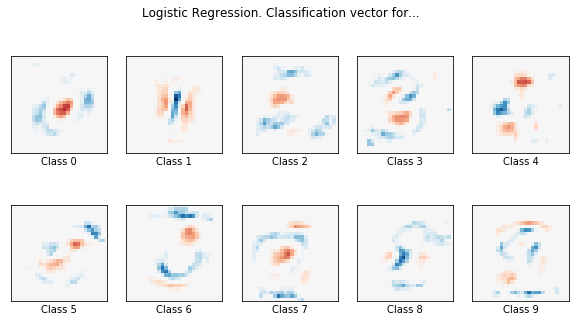

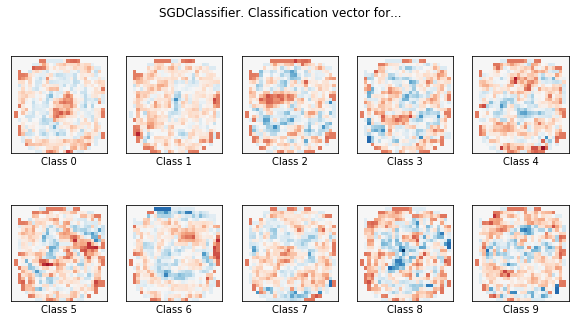

In [179]:
# Load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
train_samples = 1000

# try out two different classifiers
# No. 1: Logistic Regression, No. 2: SGDClassifier
clfs = [LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l1', solver='saga', tol=0.1), 
                SGDClassifier()]
clflabels = ["Logistic Regression", "SGDClassifier"]

c = 0
for clf in clfs:
    clf_name = clflabels[c]
    classify(X, y, clf, clf_name, train_samples)
    c+=1

### A1 - b - Wrongly classified digits

Wrongly predicted


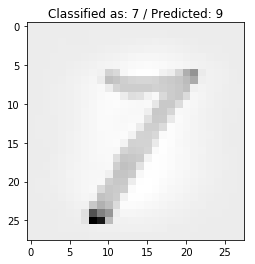

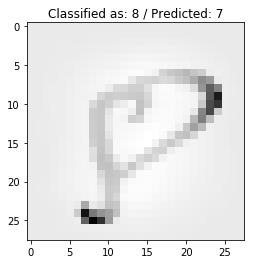

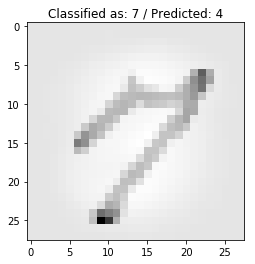

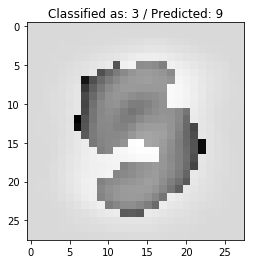

In [141]:
# check data set for samples where the classification does not
# match the prediction by the model

print("Wrongly predicted")
for i in range(20):
    if clf.predict([X_test[i]])[0] != y_test[i]:
        plt.figure()
        sample = X_test[i].reshape((28,28))
        plt.title("Classified as: %s / Predicted: %s" % (y_test[i], clf.predict([X_test[i]])[0] ))
        plt.imshow(sample, cmap = "Greys", interpolation = "nearest")

Correctly predicted


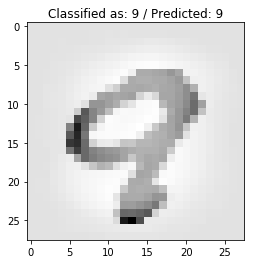

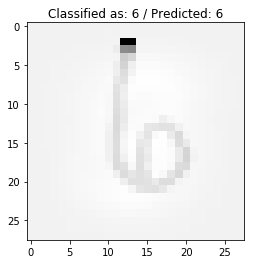

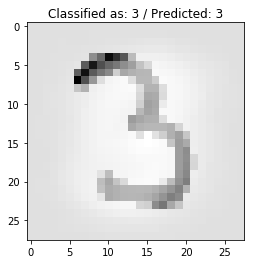

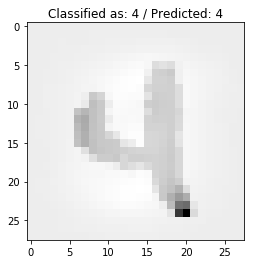

In [142]:
# Now check data set for samples where the classification DOES
# match the prediction by the model

print("Correctly predicted")
for i in range(4):
    if clf.predict([X_test[i]])[0] == y_test[i]:
        plt.figure()
        sample = X_test[i].reshape((28,28))
        plt.title("Classified as: %s / Predicted: %s" % (y_test[i], clf.predict([X_test[i]])[0] ))
        plt.imshow(sample, cmap = "Greys", interpolation = "nearest")


It can be seen that the quality of the images which have been wrongly predicted is quite poor in a sense of poor handwriting, e.g. through entailing serifs ("7") or omitting features such as the "bottom hole" in the "8" or the "top curve" of the "3".

### A1 - c - Scan over hyper-parameters

Sparsity with L1 penalty: 76.96%
Test score with L1 penalty: 0.8239
Sparsity with L1 penalty: 21.68%
Test score with L1 penalty: 0.8345
Sparsity with L1 penalty: 21.43%
Test score with L1 penalty: 0.8368
Sparsity with L1 penalty: 22.07%
Test score with L1 penalty: 0.8676
Sparsity with L1 penalty: 22.83%
Test score with L1 penalty: 0.8607


/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Sparsity with L1 penalty: 25.92%
Test score with L1 penalty: 0.7801


/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Sparsity with L1 penalty: 22.32%
Test score with L1 penalty: 0.8432


/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Sparsity with L1 penalty: 23.62%
Test score with L1 penalty: 0.8449


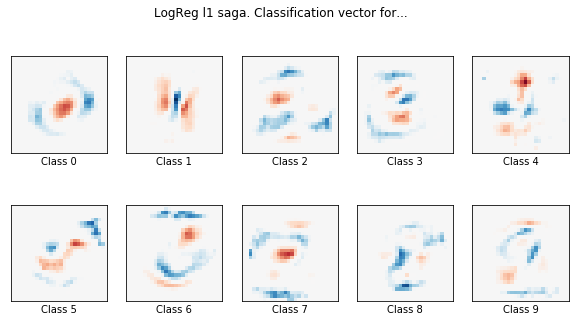

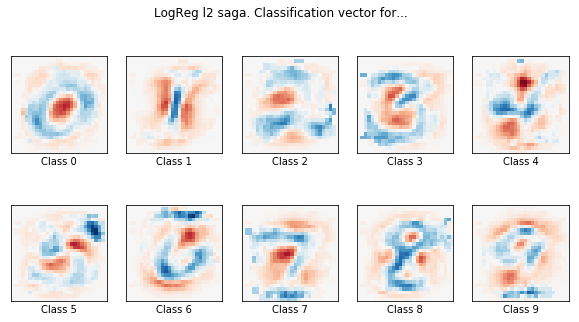

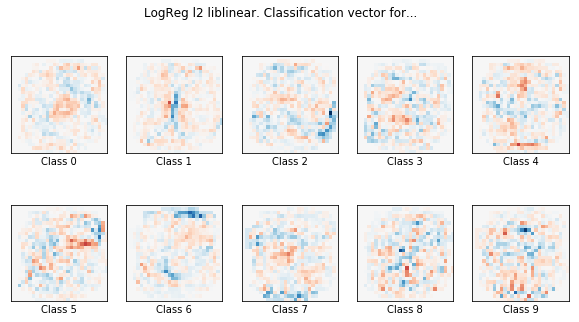

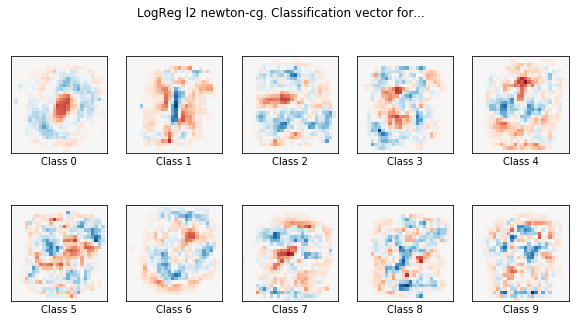

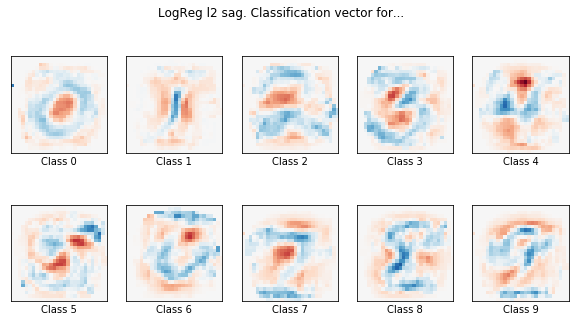

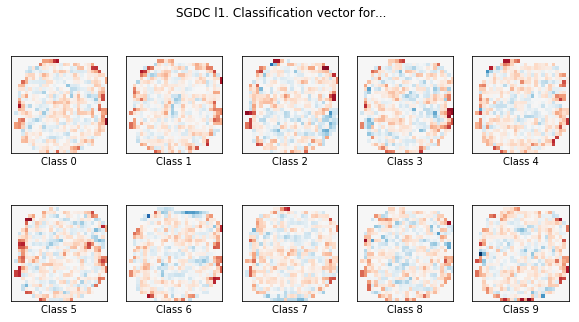

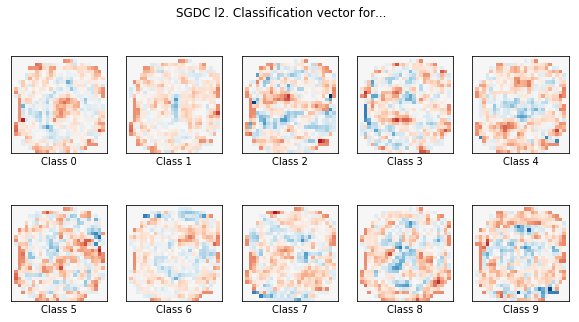

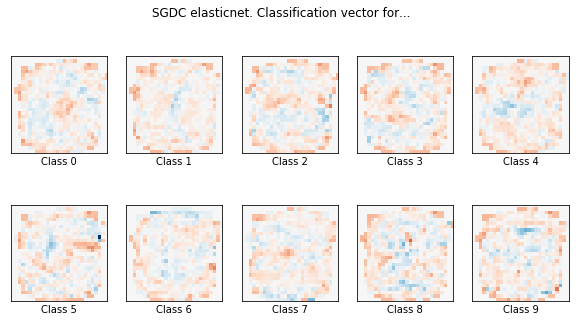

In [68]:
# Load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
train_samples = 1000

# try out different classifiers
# No. 1: Logistic Regression, No. 2: SGDClassifier
clfs = [LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l1', solver='saga', tol=0.1),
       LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l2', solver='saga', tol=0.1),
        LogisticRegression(C=50. / train_samples,multi_class='ovr',penalty='l2', solver='liblinear', tol=0.1),
       LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l2', solver='newton-cg', tol=0.1), 
    LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l2', solver='sag', tol=0.1),
        SGDClassifier(penalty = "l1"),
       SGDClassifier(penalty = "l2"),
       SGDClassifier(penalty = "elasticnet")]
clflabels = ["LogReg l1 saga", "LogReg l2 saga", "LogReg l2 liblinear", "LogReg l2 newton-cg", "LogReg l2 sag", "SGDC l1", "SGDC l2", "SGDC elasticnet",]

c = 0
for clf in clfs:
    clf_name = clflabels[c]
    classify(X, y, clf, clf_name, train_samples)
    c+=1

A1 - c - Discussion:

| Setting | Test score |
| --- | --- |
| LogReg l1 saga | 0.8239 |
| LogReg l2 saga | 0.8345 |
| LogReg l2 liblinear | 0.8368 |
| LogReg l2 newton-cg | 0.8676 |
| LogReg l2 sag | 0.8607 |
| SGDC l1 | 0.7801 |
| SGDC l2 | 0.8432 |
| SGDC elasticnet | 0.8449 |

 - In total, the performance of the different settings is quite similar with performances amounting to $R^2 \approx 0.80$.
 - The best option seems to be LogReg with l2 regularisation and newton-cg optimizer with a performance of $R^2 = 0.8676$, while the worst performance of $R^2 \approx 0.7801$ was achieved by LogReg with l2 regularisation and sag optimizer.

### A1 - d - Comparison to random guessing

Sparsity with L1 penalty: 77.98%
Test score with L1 penalty: 0.8239
$R^2$ = -0.999390


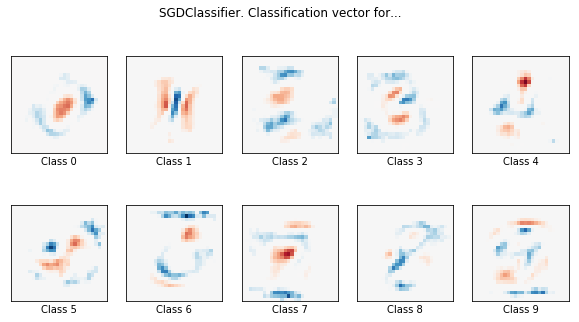

In [184]:
# Load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
train_samples = 1000

clf = LogisticRegression(C=50. / train_samples,multi_class='multinomial',penalty='l1', solver='saga', tol=0.1)
clflabel = "Logistic Regression"

y_test = classify(X, y, clf, clf_name, train_samples)


# create a sample of random "predicted" data and compare it to 
# test data
y_pred_random = np.random.randint(0,10, size=int(y_test.size))
y_test = [int(i) for i in y_test]

# compute performance R^2
performance = 1 - np.sum((y_test - y_pred_random)**2) / (np.sum( (y_test - 1/(y_pred_random.size) *np.sum(y_pred_random))**2 ))
print("$R^2$ = %f" % performance)

A1 - d - Discussion: 
 
Guessing one handwritten digit of a total of 10 digits correctly is done with a probability of 0.1. This yields a performance of $ R^2 \approx -1 $ as shown above. This is a terrible performance compared to our model.

## A2 - 1D Ising - Regression

### A2 - a - Plot the error instead of the built-in scoring function.

In [23]:
# Recycle code from the lecture to set up 1D Ising model

L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)


# reshape Ising states into RL samples: S_iS_j --> X_p
states=np.einsum('...i,...j->...ij', states, states)
shape=states.shape
states=states.reshape((shape[0],shape[1]*shape[2]))
# build final data set
Data=[states,energies]


# define number of samples
n_samples=500
# define train and test data sets
X_train=Data[0][:n_samples]
Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
X_test=Data[0][n_samples:3*n_samples//2]
Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])


In [39]:
# I am using here the mean_squared_error method from sklearn
# and apply it to every of the three linear regressions
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

def regression_errors(X_train, Y_train, X_test, Y_test):
    # initialize
    # set up Lasso and Ridge Regression models
    leastsq=linear_model.LinearRegression()
    ridge=linear_model.Ridge()
    lasso = linear_model.Lasso()

    # define error lists
    train_errors_leastsq = []
    test_errors_leastsq = []

    train_errors_ridge = []
    test_errors_ridge = []

    train_errors_lasso = []
    test_errors_lasso = []

    # set regularisation strength values
    lmbdas = np.logspace(-4, 5, 10)

    #Initialize coeffficients for ridge regression and Lasso
    coefs_leastsq = []
    coefs_ridge = []
    coefs_lasso=[]


    # iterate over lambdas
    for lmbda in lmbdas:

        ### ordinary least squares
        leastsq.fit(X_train, Y_train) # fit model 
        coefs_leastsq.append(leastsq.coef_) # store weights
        # use MSE (E_out) for the current lambda
        leastsq_y_pred = leastsq.predict(X_test)
        leastsq_MSE = mean_squared_error(Y_test, leastsq_y_pred)
        test_errors_leastsq.append(leastsq_MSE)

        ### apply Ridge regression
        ridge.set_params(alpha=lmbda) # set regularisation parameter
        ridge.fit(X_train, Y_train) # fit model 
        coefs_ridge.append(ridge.coef_) # store weights
        # use MSE (E_out) for the current lambda
        ridge_y_pred = ridge.predict(X_test)
        ridge_MSE = mean_squared_error(Y_test, ridge_y_pred)
        test_errors_ridge.append(ridge_MSE)

        ### apply Lasso regression
        lasso.set_params(alpha=lmbda) # set regularisation parameter
        lasso.fit(X_train, Y_train) # fit model
        coefs_lasso.append(lasso.coef_) # store weights
        # use MSE (E_out) for the current lambda
        lasso_y_pred = lasso.predict(X_test)
        lasso_MSE = mean_squared_error(Y_test, lasso_y_pred)
        test_errors_lasso.append(lasso_MSE)
    
    return test_errors_leastsq, test_errors_ridge, test_errors_lasso

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


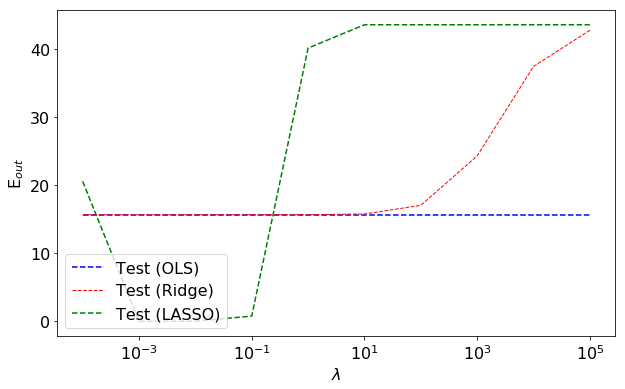

In [40]:
# Plot E_out versus lambda
def plot_regression_errors(test_errors_leastsq, test_errors_ridge, test_errors_lasso):
    plt.semilogx(lmbdas, test_errors_leastsq,'--b',label='Test (OLS)')
    plt.semilogx(lmbdas, test_errors_ridge,'--r',label='Test (Ridge)',linewidth=1)
    plt.semilogx(lmbdas, test_errors_lasso, '--g',label='Test (LASSO)')

    fig = plt.gcf()
    fig.set_size_inches(10.0, 6.0)

    #plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
    #           linewidth=3, label='Optimum on test')
    plt.legend(loc='lower left',fontsize=16)
    #plt.ylim([-0.01, 1.01])
    #plt.xlim([min(lmbdas), max(lmbdas)])
    plt.xlabel(r'$\lambda$',fontsize=16)
    plt.ylabel('E$_{out}$',fontsize=16)
    plt.tick_params(labelsize=16)
    plt.show()

test_errors_leastsq, test_errors_ridge, test_errors_lasso = regression_errors(X_train, Y_train, X_test, Y_test)
plot_regression_errors(test_errors_leastsq, test_errors_ridge, test_errors_lasso)
    

In terms of the error $E_{out}$ on the test set, we observe that for small lambdas $\lambda < 10^0$, Lasso regularisation performs better than Ridge and the ordinary least square fit.
For $\lambda > 10^0$, OLS performs best.


### A2 - b - Performance change for different number of samples

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


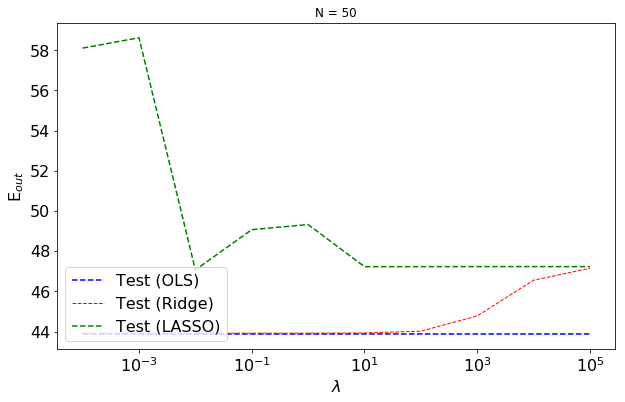

/home/mario/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


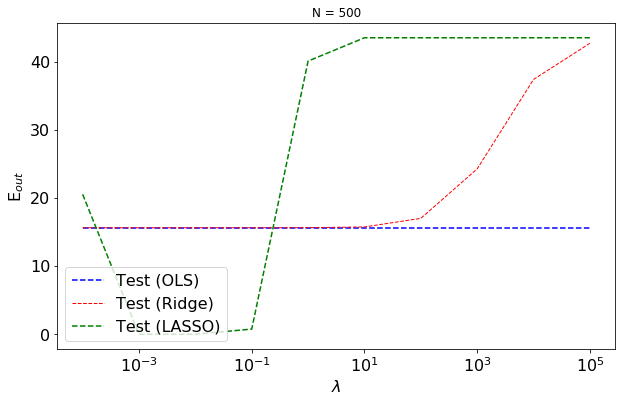

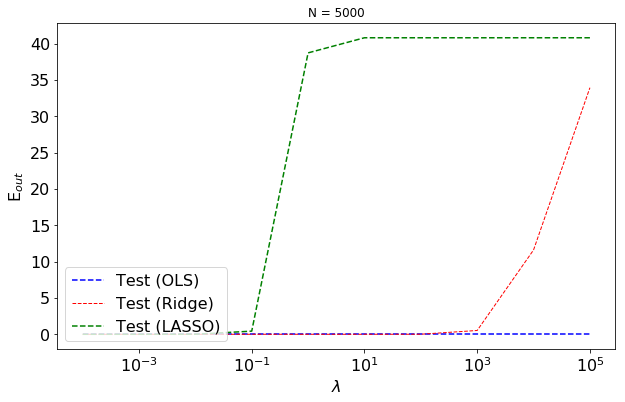

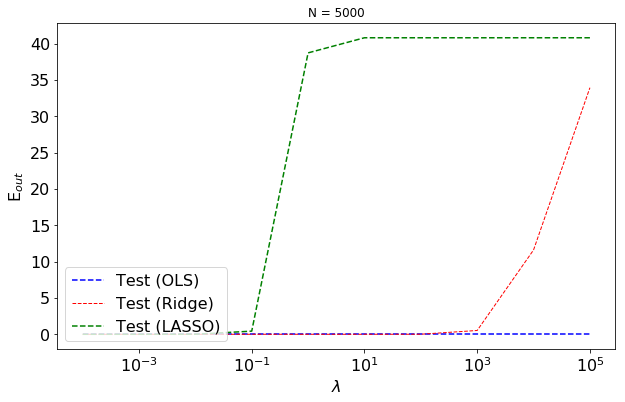

In [43]:
N = [50,500,5000,5000] 

# iterate over some numbers of samples
for n_samples in N:

    # define train and test data sets
    X_train=Data[0][:n_samples]
    Y_train=Data[1][:n_samples] #+ np.random.normal(0,4.0,size=X_train.shape[0])
    X_test=Data[0][n_samples:3*n_samples//2]
    Y_test=Data[1][n_samples:3*n_samples//2] #+ np.random.normal(0,4.0,size=X_test.shape[0])

    plt.title("N = %d" % n_samples)
    test_errors_leastsq, test_errors_ridge, test_errors_lasso = regression_errors(X_train, Y_train, X_test, Y_test)
    plot_regression_errors(test_errors_leastsq, test_errors_ridge, test_errors_lasso)
 

We observe, that for a small number of $N=50$ samples both Ridge and OLS   perform better than Lasso regularisation over the total range of $\lambda$; OLS is the preferred choice here.
For large numbers of samples $N>500$ Ridge and OLS  outperform Lasso for $\lambda > 10^{-1}$, whereas for $\lambda < 10^{-1}$ all regressions perform similarly; again OLS is the preferred choice.
Only in an intermediate range of $N=500$ Lasso performs better than Ridge and OLS for $\lambda < 10^0$; for $\lambda > 10^0$ OLS is again the best choice.

## A3 - Perceptron - XOR

General: Perceptrons consist of a layer of input neurons (here: two neurons), sending signals to a single output unit, which may also incorporates a bias signal additionally. Input neurons are not connected with each other, meaning a perceptron is a feed-forward network.

The output neuron decides based on its input and a given function (here: a heaviside step function) which classification the data shall be given (here: 1 or 0). Based on the input weights we obtain a linear classification hyperplane (here: line) separating the two groups in a generally high-dimensional phase space.

Hence, only if the the two groups of points are linear separable, the single-layer perceptron is able to give the correct output. As seen below, this is not possible with a hypothetical linear separation, as there is always at least one alien point within any separation of phase space; the XOR function is not linear separable.


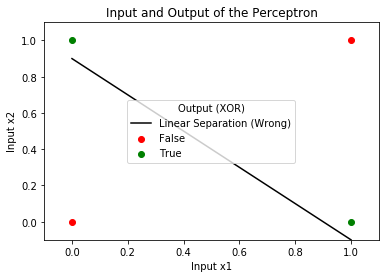

In [121]:
x1data = [0,0,1,1]
x2data = [0,1,0,1]

# Input 1 XOR Input 2 = Output:
# a) 0 XOR 0 = 0
# b) 0 XOR 1 = 1
# c) 1 XOR 0 = 1
# d) 1 XOR 1 = 0

plt.xlabel("Input x1")
plt.ylabel("Input x2")
plt.scatter([x1data[0],x1data[3]], [x2data[0],x2data[3]], c= "red", label="False")
plt.scatter([x1data[1],x1data[2]],[x2data[1],x2data[2]], c="green", label = "True")
plt.plot(np.linspace(0,1,20), np.linspace(0,1,20)*(-1)+0.9, c="black", label="Linear Separation (Wrong)")
plt.xlim([-0.1,1.1])
plt.ylim([-0.1, 1.1])
plt.title("Input and Output of the Perceptron")
plt.legend(title = "Output (XOR)", loc="center")

## A4 - Shannon Information Content

Independent random variables: $P(X,Y) = P(X) \cdot P(Y)$

The Shannon entropy is defined as: $H(X) = - \sum_{i} p(x_i) \log(p(x_i))$

Now, let us decompose an entropy composed of the joint probabilities of two independent random variables:

$$ H(X,Y) = -\sum_{ij} p(x_i,y_i) \log (p(x_i,y_j)) = -\sum_{ij} p(x_i) p(y_j) \log (p(x_i) p(y_j))$$ (using the independence of the RV)

$$ = -\sum_{ij} p(x_i) p(y_j) [\log (p(x_i)) + \log (p(y_j)]$$
$$= -\sum_{ij} p(x_i) p(y_j) \log(p(x_i)) - \sum_{ij} p(x_i) p(y_j) \log(p(y_i)) $$
$$= -\sum_j p(y_j) \sum_i p(x_i) \log(p(x_i)) - \sum_i p(x_i) \sum_j p(y_j) \log(p(y_j)) $$
$$=  -\sum_i p(x_i) \log(p(x_i)) - \sum_j p(y_j) \log(p(y_j)) $$ (using $\sum_k p_k = 1$)

$$= H(X) + H(Y)$$

Hence, Shannon entropy is additive, $H(X,Y) = H(X) + H(Y)$.